In [68]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import pandas as pd
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test

In [34]:
data = pd.read_table('../data/brca_metabric_clinical_data.tsv')
data.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,YES,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,YES,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,NO,151.28,1:Recurred,1,Primary,Female,NaN,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,YES,162.76,0:Not Recurred,1,Primary,Female,NaN,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,YES,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [35]:
data.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [42]:
print(data['Overall Survival Status'].unique())
data_filtered = data[data['Overall Survival Status'].notna()]
print(data_filtered['Overall Survival Status'].unique())
data_filtered['Overall Survival Status'] = (data_filtered['Overall Survival Status'] == '1:DECEASED').astype(int)
# data_filtered['Overall Survival (Months)'] = data_filtered['Overall Survival (Months)'].astype(int)
print(data['Overall Survival Status'])

['0:LIVING' '1:DECEASED' nan]
['0:LIVING' '1:DECEASED']
0         0:LIVING
1         0:LIVING
2       1:DECEASED
3         0:LIVING
4       1:DECEASED
           ...    
2504           NaN
2505           NaN
2506           NaN
2507           NaN
2508           NaN
Name: Overall Survival Status, Length: 2509, dtype: object


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
T = data_filtered['Overall Survival (Months)']
E = data_filtered['Overall Survival Status']

In [47]:
T.head()

0    140.500000
1     84.633333
2    163.700000
3    164.933333
4     41.366667
Name: Overall Survival (Months), dtype: float64

148.1
185.0


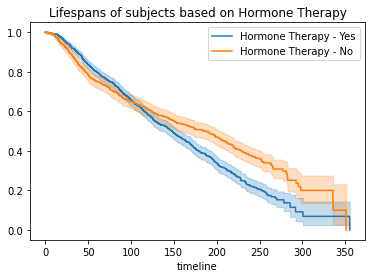

In [67]:
ax = plt.subplot(111)
kmf = KaplanMeierFitter()
dem = (data_filtered["Hormone Therapy"] == "YES")

kmf.fit(T[dem], event_observed=E[dem], label="Hormone Therapy - Yes")
kmf.plot_survival_function(ax=ax)
print(kmf.median_survival_time_)

kmf.fit(T[~dem], event_observed=E[~dem], label="Hormone Therapy - No")
kmf.plot_survival_function(ax=ax)
print(kmf.median_survival_time_)

plt.title("Lifespans of subjects based on Hormone Therapy");

In [60]:
results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

print(results.print_summary())
print(results.p_value)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          14.41 <0.005     12.73

None
0.00014707709561603537


<AxesSubplot:xlabel='timeline'>

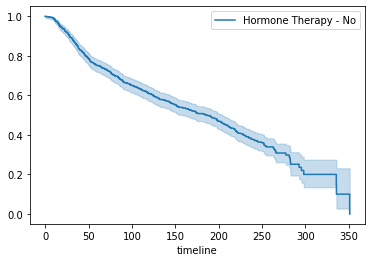

In [53]:
kmf.plot_survival_function()

In [74]:
df_r= data_filtered.loc[:,['Type of Breast Surgery', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'HER2 status measured by SNP6','Hormone Therapy','Primary Tumor Laterality','Sex', 'Overall Survival Status', 'Overall Survival (Months)']
                     ]
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,Overall Survival Status,Overall Survival (Months),Type of Breast Surgery_MASTECTOMY,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer,...,Pam50 + Claudin-low subtype_LumA,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_NC,Pam50 + Claudin-low subtype_Normal,Pam50 + Claudin-low subtype_claudin-low,HER2 status measured by SNP6_LOSS,HER2 status measured by SNP6_NEUTRAL,HER2 status measured by SNP6_UNDEF,Hormone Therapy_YES,Primary Tumor Laterality_Right
0,0,140.500000,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,0,84.633333,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
2,1,163.700000,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
3,0,164.933333,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1
4,1,41.366667,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1


In [75]:
cph = CoxPHFitter()  
cph.fit(df_dummy, 'Overall Survival (Months)', event_col='Overall Survival Status')   
cph.print_summary()   

<lifelines.CoxPHFitter: fitted with 1981 total observations, 837 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 1981
number of events observed = 1144
   partial log-likelihood = -7789.87
         time fit was run = 2021-05-21 15:45:57 UTC

---
                                                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                                              
Type of Breast Surgery_MASTECTOMY                                0.41       1.50       0.06             0.28             0.53                 1.33                 1.70
Cancer Type Detailed_Breast Angiosarcoma                       -11.39       0.00     626.06         -1238.43          1215.66                 0.00                  inf
Cancer Type Detailed_Breast Invasive Ductal Carcinoma            0.79       2.21       0.45            -0.09             1.67                 0.91                 5.33
Cancer Type Detailed_Breast Invasive Lobular Carcinoma           0.87       2.40       0.46            -0.03             1.78                 0.97                 5.93
Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma    0.43       1.54       0.55            -0.65             1.51                 0.52                 4.52
Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma   0.87       2.38       0.46            -0.03             1.77                 0.97                 5.84
Cancer Type Detailed_Invasive Breast Carcinoma                   0.43       1.54       0.51            -0.56             1.43                 0.57                 4.18
Cancer Type Detailed_Metaplastic Breast Cancer                   2.63      13.88       0.85             0.97             4.29                 2.63                73.21
Cellularity_Low                                                  0.09       1.09       0.11            -0.12             0.30                 0.88                 1.35
Cellularity_Moderate                                             0.03       1.03       0.06            -0.10             0.15                 0.90                 1.16
Chemotherapy_YES                                                 0.20       1.22       0.08             0.04             0.36                 1.04                 1.43
Pam50 + Claudin-low subtype_Her2                                 0.08       1.09       0.13            -0.17             0.34                 0.84                 1.41
Pam50 + Claudin-low subtype_LumA                                -0.30       0.74       0.12            -0.53            -0.07                 0.59                 0.93
Pam50 + Claudin-low subtype_LumB                                 0.11       1.11       0.12            -0.13             0.34                 0.88                 1.41
Pam50 + Claudin-low subtype_NC                                   0.24       1.27       0.46            -0.67             1.14                 0.51                 3.13
Pam50 + Claudin-low subtype_Normal                              -0.25       0.78       0.15            -0.55             0.06                 0.58                 1.06
Pam50 + Claudin-low subtype_claudin-low                         -0.41       0.66       0.14            -0.69            -0.13                 0.50                 0.87
HER2 status measured by SNP6_LOSS                               -0.10       0.91       0.16            -0.40             0.21                 0.67                 1.23
HER2 status measured by SNP6_NEUTRAL                            -0.16       0.85       0.08            -0.31            -0.01                 0.73                 0.99
HER2 status measured by SNP6_UNDEF                              -0.23   

<AxesSubplot:xlabel='log(HR) (95% CI)'>

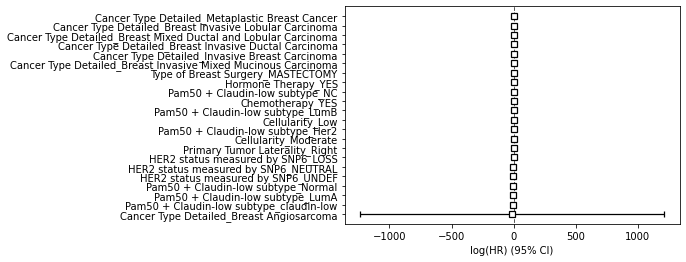

In [76]:
cph.plot()

In [77]:
tr_rows = df_dummy.iloc[5:10, 2:]
tr_rows

,Type of Breast Surgery_MASTECTOMY,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer,Cellularity_Low,Cellularity_Moderate,...,Pam50 + Claudin-low subtype_LumA,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_NC,Pam50 + Claudin-low subtype_Normal,Pam50 + Claudin-low subtype_claudin-low,HER2 status measured by SNP6_LOSS,HER2 status measured by SNP6_NEUTRAL,HER2 status measured by SNP6_UNDEF,Hormone Therapy_YES,Primary Tumor Laterality_Right
5,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
6,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,1
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
10,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1


<AxesSubplot:>

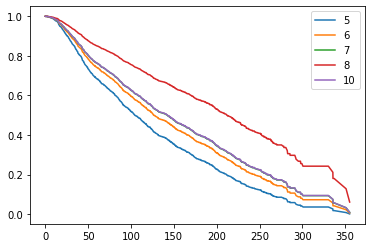

In [78]:
cph.predict_survival_function(tr_rows).plot()